# Regridding and aggregation with GriddedData.py
 - **context** : following a question by Manu Cosme, preparing CNES visit in Jan 2017
 - **author** : J. Le Sommer
 - **purpose** : showing how to aggregate data in boxes with GriddedData averager. 

## 0. Required datasets and packages installations 

### Modules
`GriddedData` module is available in my github account : 
```
git clone https://github.com/lesommer/codes.git
cd codes
./install_modules.sh
```

`colormaps` package is available in github https://github.com/BIDS/colormap

## 1. Modules and datasets

### Modules

In [1]:
import xarray as xr
import numpy as np
import GriddedData

In [2]:
### color palette
import matplotlib.cm as mplcm
import colormaps as cmaps
import matplotlib.ticker as mticker
import matplotlib.cm as cm
cm.register_cmap(name='viridis', cmap=cmaps.viridis)
import seaborn as sns
seq_cmap = cmaps.viridis # future default matplotlib
div_cmap = mplcm.seismic

### plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%config InlineBackend.figure_format = 'retina'

### Dataset

In [4]:
datadir = "/Users/lesommer/data/NATL60/NATL60-CJM165/"
filegridT = datadir + 'NATL60-CJM165_y2013m03.1d.gridTsurf.nc'
xds_filegridT = xr.open_dataset(filegridT,engine='netcdf4',lock=False)
xda_sst = xds_filegridT.sosstsst

In [5]:
sst = xda_sst[0]
lat = xda_sst.nav_lat
lon = xda_sst.nav_lon

In [6]:
sst_hi = sst.to_masked_array()
lat_hi = lat.to_masked_array()
lon_hi = lon.to_masked_array()

## 2. Defining and testing the plotting fonction for NATL60 model output

In [7]:
### plotting function
def north_atlantic_plot(lat=None,lon=None,data=None,
                       vmin=None,vmax=None,cmap=None):
    plt.figure(figsize=(15,10))
    pj = ccrs.PlateCarree()
    ax = plt.axes(projection=pj)
    ax.coastlines(resolution="10m")

    #- gridlines
    # see http://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html
    #gl = ax.gridlines(draw_labels=True)
    gl = ax.gridlines(crs=pj, draw_labels=True,
                  linewidth=1, color='black', alpha=0.2, linestyle='--')

    label_style = {'size': 12, 'color': 'black', 'weight': 'bold'}

    gl.xlabel_style = label_style
    gl.xlabels_bottom = False
    gl.xlocator = mticker.FixedLocator(np.arange(-90,10,5,dtype=float))

    gl.ylabel_style = label_style
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator(np.arange(20,80,5,dtype=float))

    # pcolormesh
    cs = plt.pcolormesh(lon, lat, data,transform=pj,cmap=cmap,vmin=vmin,vmax=vmax)

    # limits
    plt.xlim((-83,3))
    plt.ylim((27,65)) 

    #colorbar
    cb = plt.colorbar(cs, extend='both', fraction=0.042, pad=0.04, orientation="horizontal")

    cb.ax.tick_params(labelsize=14)

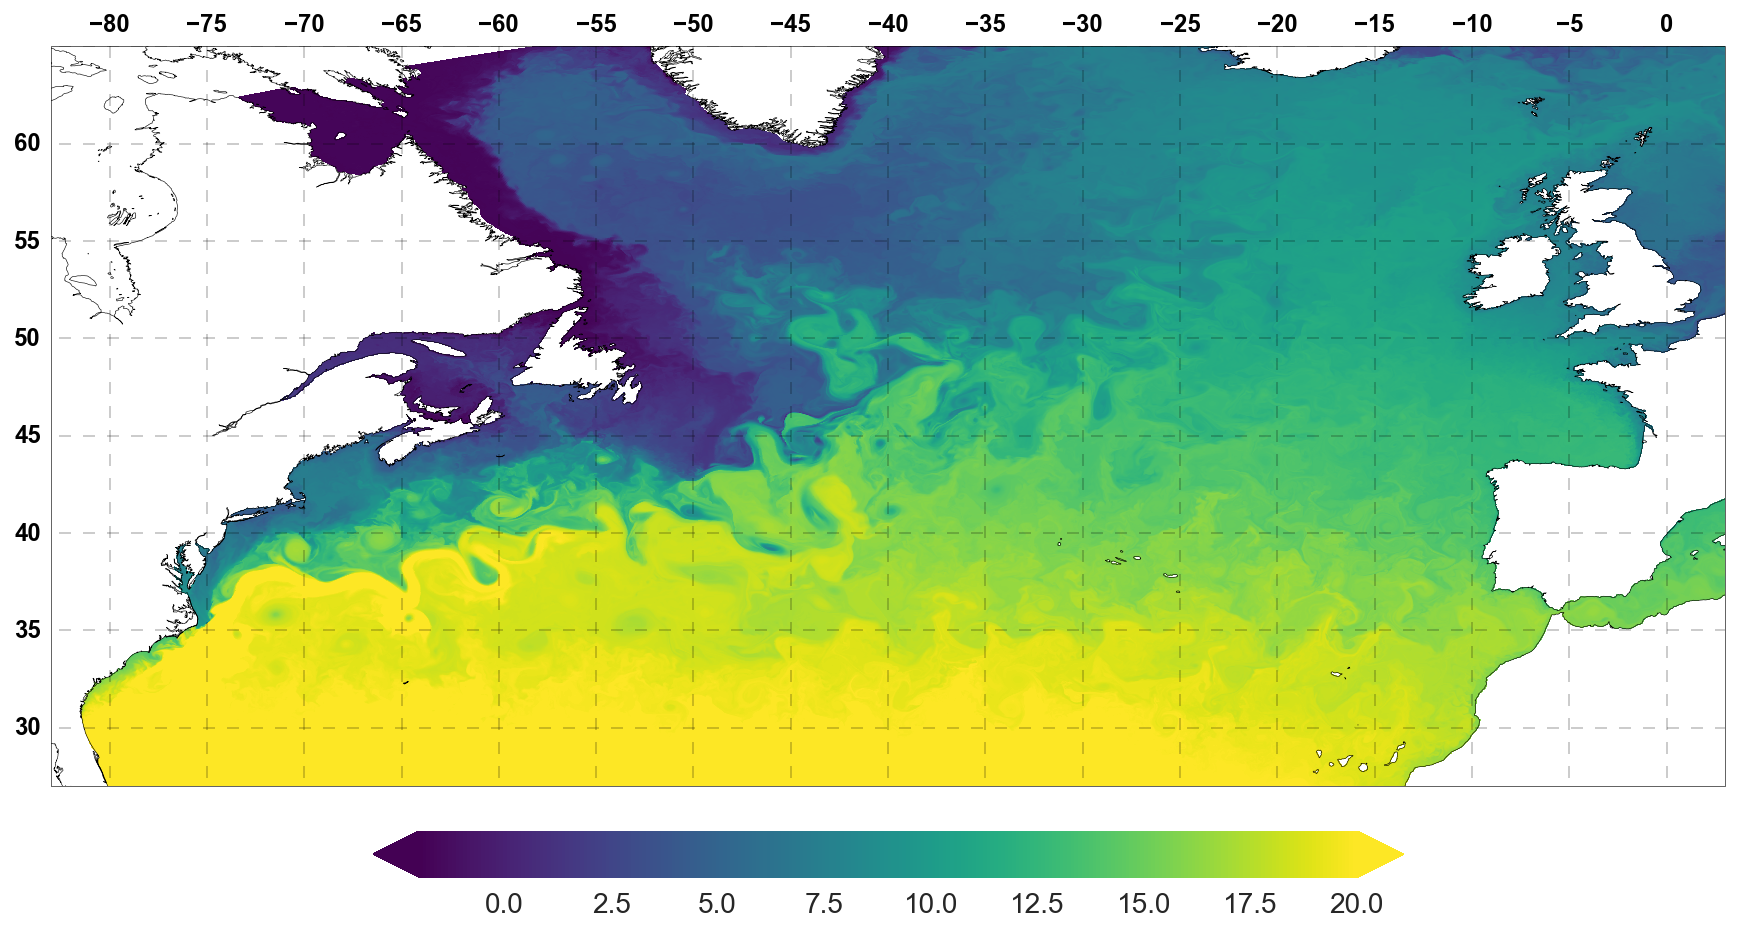

In [8]:
north_atlantic_plot(lat=lat_hi,lon=lon_hi,data=sst_hi,vmin=-2,vmax=20,cmap='viridis')

## 3. Regridding with GriddedData

In [9]:
## defining a GriddedData averager
mgrd = GriddedData.grid2D(navlat=lat_hi, navlon=lon_hi)
weigths = mgrd.t_surf

In [10]:
## applying the averager
coarsen = GriddedData.grdCoarsener(mgrd,crs_factor=60)
sst_lo = coarsen(sst_hi)
lat_lo = coarsen(lat_hi)
lon_lo = coarsen(lon_hi)

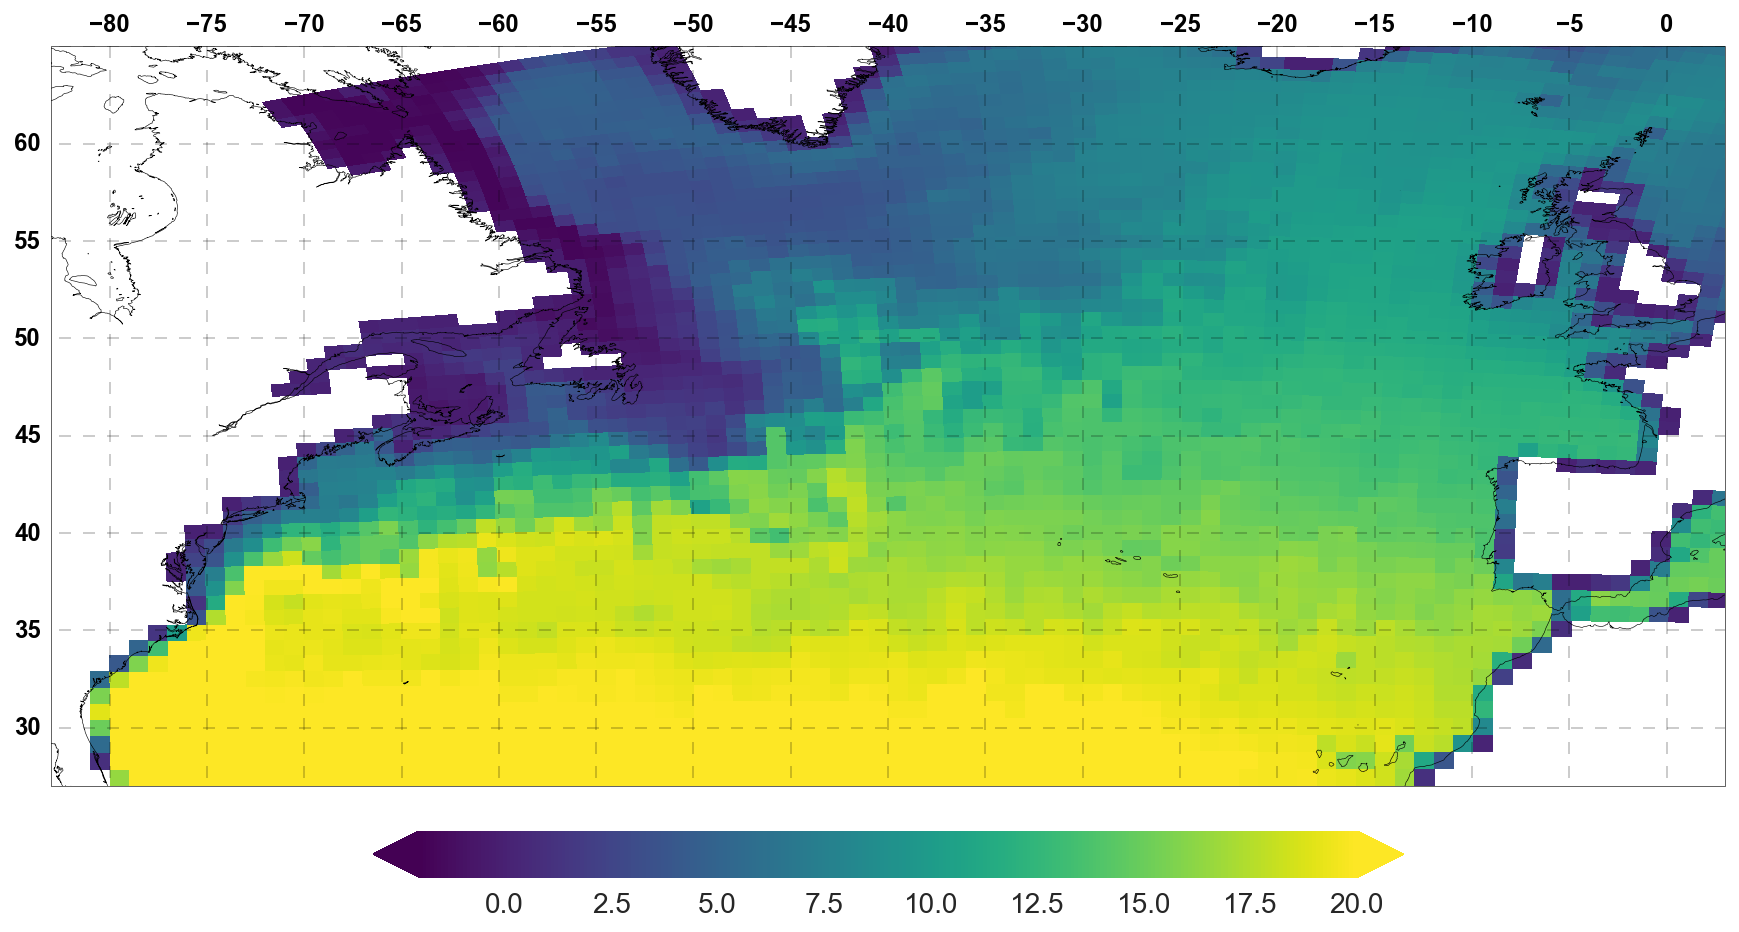

In [11]:
north_atlantic_plot(lat=lat_lo,lon=lon_lo,data=sst_lo,vmin=-2,vmax=20,cmap='viridis')

Note that `coarsen` also comes with methods for getting not only the average but all kind of statistics from the realizations at high resolution.